## Drift, Navie, Mean Prediction Model with Stocks


In this analysis, we examine the historical stock price data of a chosen company, applying three simple time series forecasting models—Drift, Naive, and Mean—to project future prices. The goal is to generate predictions for a specified forecast period and compare these predictions to actual observed data.

---

##### 1. Data Collection: 
We fetch historical stock prices from Yahoo Finance, specifying a date range and stock ticker. The data is divided into a training period (up to the forecast start date) and a test period (the forecast period).

##### 2. Forecasting Models:

- Drift Model: This model assumes a consistent rate of change based on the overall trend of the training data, projecting this trend forward.

- Naive Model: The Naive model is a simple approach that assumes the future price will remain the same as the last observed value in the training period.

- Mean Model: This model takes the average of the last specified number of days (e.g., last 30 days) in the training period and uses this average as the projected price.
Evaluation and Visualization:

##### 3. Forecasting Plots
We generate predictions from each model for the length of the test period. These predictions are then plotted alongside the actual stock prices during the test period.
The entire historical dataset is displayed, providing context for the test period and the models’ performance.


### Package Load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import timedelta

### Define the function include 3 models and plotting:

In side of forecast_and_plot function, it includes 3 fucntions to define the forcasting models: drift_forecast, naive_forecast and mean_forecast

In [ ]:
def forecast_and_plot(ticker, start_date, end_date, forecast_start, forecast_steps=15, mean_days=30):
    """
    Fetches historical data for a given stock ticker, applies Drift, Naive, and Mean forecasting models,
    and plots the results along with the actual values for the forecast period.
    
    Parameters:
    - ticker (str): Stock ticker symbol 
    - start_date (str): Start date for historical data 
    - end_date (str): End date for historical data 
    - forecast_start (str): Start date for the forecast period 
    - forecast_steps (int): Number of days to forecast
    - mean_days (int): Number of days to use for the Mean forecast model (default: 30)
    """
    
    # Data fetch from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']

    # Split data into training and testing sets
    train_data = data[:forecast_start]  # Up to the forecast start date
    test_data = data[forecast_start:]  # From the forecast start date onwards

    # Define forecasting models
    def drift_forecast(series, steps=1):
        drift = (series.iloc[-1] - series.iloc[0]) / (len(series) - 1)
        return series.iloc[-1] + np.arange(1, steps + 1) * drift

    def naive_forecast(series, steps=1):
        return np.repeat(series.iloc[-1], steps)

    def mean_forecast(series, steps=1, days=30):
        last_month_mean = series.iloc[-days:].mean()  # Calculate mean of the last `days` days
        return np.repeat(last_month_mean, steps)

    # Generate forecasts using the training data
    drift = drift_forecast(train_data, steps=len(test_data))
    naive = naive_forecast(train_data, steps=len(test_data))
    mean = mean_forecast(train_data, steps=len(test_data), days=mean_days)

    # Create a DataFrame for forecasts and actual values in the test period
    dates = test_data.index
    forecasts = pd.DataFrame({
        'Drift': drift,
        'Naive': naive,
        'Mean': mean,
        'Actual': test_data.values
    }, index=dates)

    # Plot the entire original data along with the forecasts and actual test data
    plt.figure(figsize=(14, 8))
    plt.plot(data.index, data, label="Original Data", color='black')  # Plot the entire original data
    plt.plot(forecasts.index, forecasts['Drift'], label="Drift Forecast", color='blue')
    plt.plot(forecasts.index, forecasts['Naive'], label="Naive Forecast", color='orange')
    plt.plot(forecasts.index, forecasts['Mean'], label="Mean Forecast", color='green')
    plt.plot(forecasts.index, forecasts['Actual'], label="Actual Data", color='red')

    # Plot settings
    plt.title(f"{ticker} Stock Price - Drift, Naive, Mean Models vs Actual")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    #plt.grid(True)
    plt.show()



[*********************100%%**********************]  1 of 1 completed


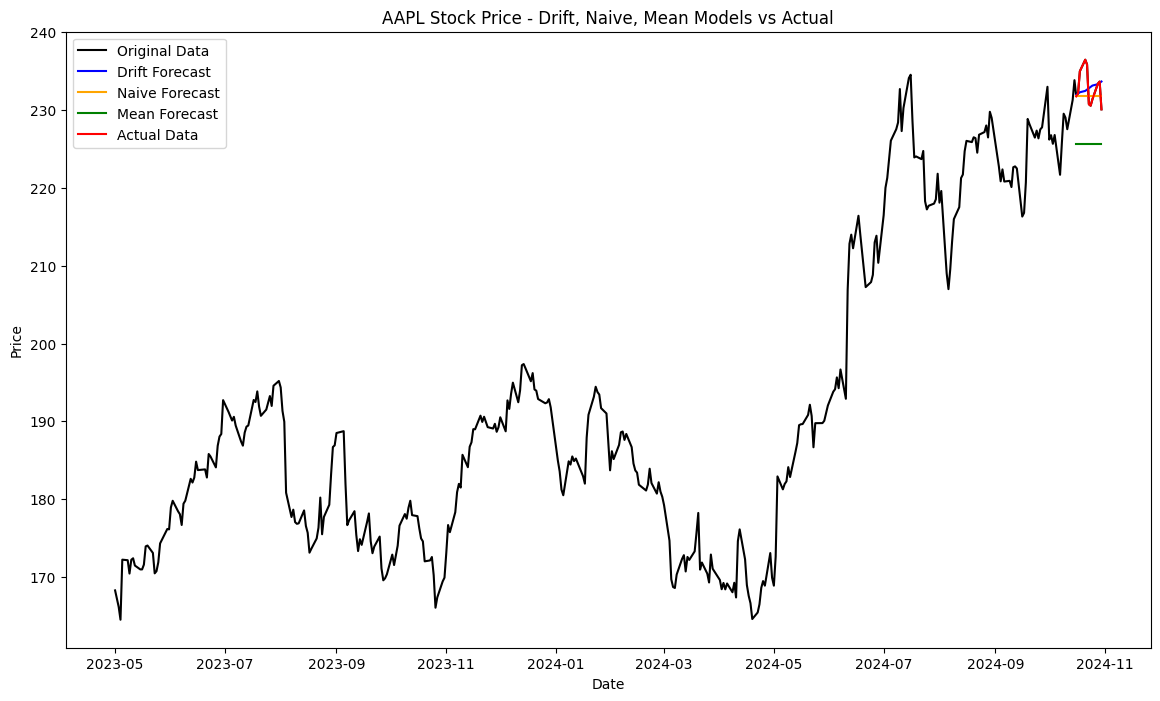

In [39]:
# Example usage
forecast_and_plot(
    ticker='AAPL',
    start_date="2023-05-01",
    end_date="2024-10-31",
    forecast_start="2024-10-16",
    forecast_steps=15,
    mean_days=30
)

Performance in This Case: Given that Apple’s stock price has been trending upward, the Drift model is likely the most effective of the three in this scenario, as it captures the general upward trend in a way the Naive and Mean models do not.

Shortcomings: All three models are relatively simple and may not fully capture Apple’s volatile price movements. While the Drift model is the closest in this case, it is still limited by assuming a steady rate of increase.